Подключение данных

In [ ]:
import xlrd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

book = xlrd.open_workbook('/content/drive/MyDrive/Terver/05_Зачисление.xls')

sheet = book.sheet_by_index(0)
row = sheet.row(1)

Парсинг данных

In [ ]:
COA = []
GRE = []
TOEFL = []
UR = []
SOP = []
LOR = []
CGPA = []
RES = []
for i in range(sheet.nrows-1):
  COA.append(float(sheet.cell_value(i+1, 8)))
  GRE.append(float(sheet.cell_value(i+1, 1)))
  TOEFL.append(float(sheet.cell_value(i+1, 2)))
  UR.append(float(sheet.cell_value(i+1, 3)))
  SOP.append(float(sheet.cell_value(i+1, 4)))
  LOR.append(float(sheet.cell_value(i+1, 5)))
  CGPA.append(float(sheet.cell_value(i+1, 6)))
  RES.append(float(sheet.cell_value(i+1, 7)))

Построение диаграмм рассеивания

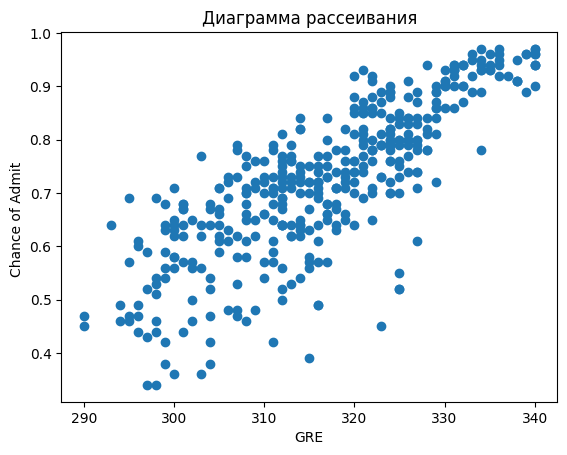

In [ ]:
plt.scatter(GRE, COA)
plt.title("Диаграмма рассеивания")
plt.xlabel("GRE")
plt.ylabel("Chance of Admit ")
plt.show()

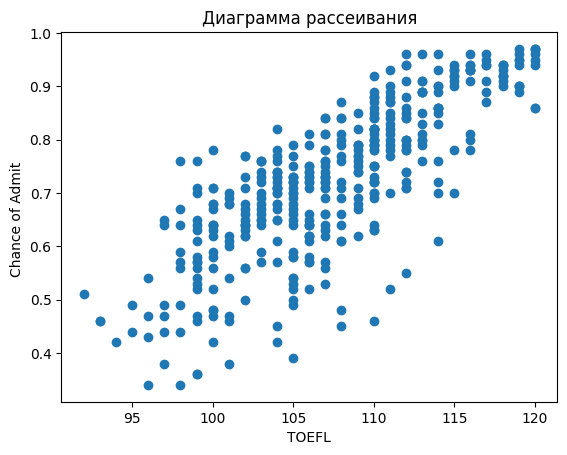

In [ ]:
plt.scatter(TOEFL, COA)
plt.title("Диаграмма рассеивания")
plt.xlabel("TOEFL")
plt.ylabel("Chance of Admit ")
plt.show()

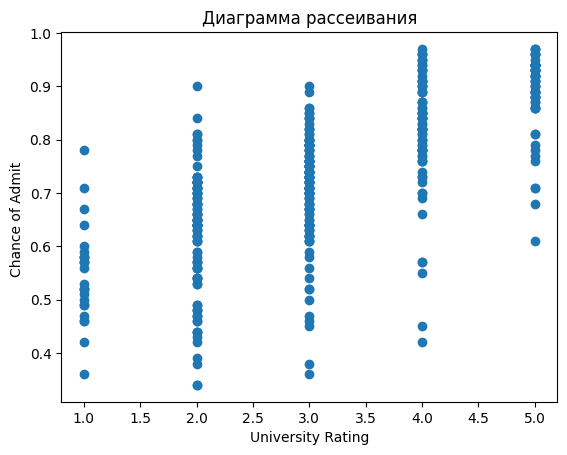

In [ ]:
plt.scatter(UR, COA)
plt.title("Диаграмма рассеивания")
plt.xlabel("University Rating")
plt.ylabel("Chance of Admit ")
plt.show()

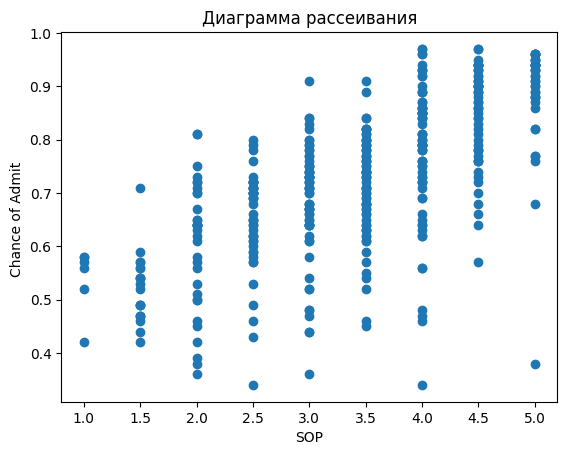

In [ ]:
plt.scatter(SOP, COA)
plt.title("Диаграмма рассеивания")
plt.xlabel("SOP")
plt.ylabel("Chance of Admit ")
plt.show()

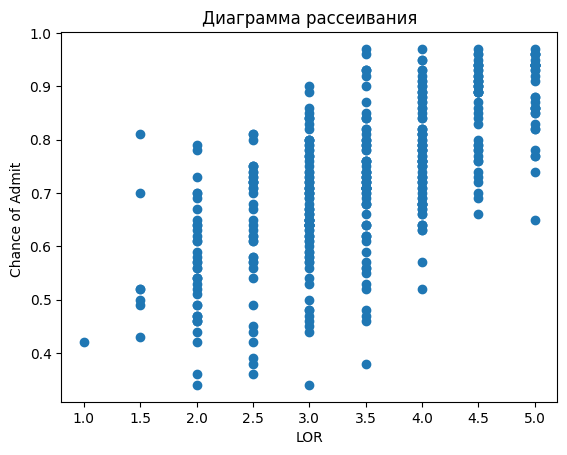

In [ ]:
plt.scatter(LOR, COA)
plt.title("Диаграмма рассеивания")
plt.xlabel("LOR")
plt.ylabel("Chance of Admit ")
plt.show()

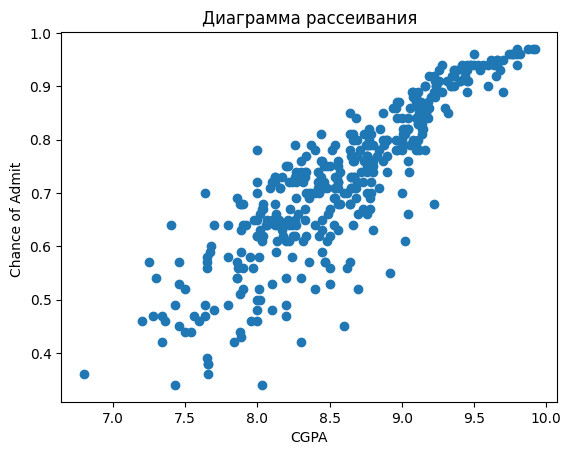

In [ ]:
plt.scatter(CGPA, COA)
plt.title("Диаграмма рассеивания")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit ")
plt.show()

Наиболее кучно точки лежат на графиках CGPA-CoA, TOEFL-CoA, GRE-CoA, поэтому можно предположить, что шанс потупления в большей степени зависит от этих 3 величин

In [ ]:
data = []
for i in range(len(GRE)):
  data.append([GRE[i],CGPA[i],TOEFL[i]])

dataTr, dataVal = model_selection.train_test_split(data, test_size = 0.2, train_size = 0.8, shuffle=False)
resTr, resVal = model_selection.train_test_split(COA, test_size = 0.2, train_size = 0.8, shuffle=False)
greTr, greVal = model_selection.train_test_split(GRE, test_size = 0.2, train_size = 0.8, shuffle=False)

LinR = linear_model.LinearRegression().fit(dataTr, resTr)
Y_predict = LinR.predict(dataVal)
r2_res = metrics.r2_score(resVal, Y_predict)
MSE = metrics.mean_squared_error(resVal, Y_predict)
print('r2 -', r2_res," MSE -", MSE)


r2 - 0.8197595272367505  MSE - 0.003995300439506571


In [ ]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
a = [100,80,240,230,180,160,150,210,250,230,260,215,270,175,145,190,320,300,390,235,160,195,180,215,220,210,60,120,130,250]
print(np.mean(a))
print(np.var(a))

202.33333333333334
4836.222222222223


Наилучший результат, как и предполагалось, достигается при построении регрессии по признакам GRE, CGPA, TOEFL